In [1]:
%load_ext autoreload
%autoreload 2

import datetime

from robin.plotter.entities import KernelPlotter
from robin.supply.generator.entities import SupplyGenerator
from robin.supply.entities import Supply

from pathlib import Path

In [2]:
supply_config_path = Path("../configs/supply_generator/supply_data.yaml")
generator_config_path = Path("../configs/supply_generator/config.yaml")

# Save paths
generator_save_path = Path(f'../data/generator/supply_dummy.yaml')

In [3]:
seed = 60
SAFETY_GAP = 10

generator = SupplyGenerator.from_yaml(
    path_config_supply=supply_config_path,
    path_config_generator=generator_config_path
)
generator.generate(
    n_services=40,
    #n_services_by_tsp={'1': 25, '2': 5},
    output_path=generator_save_path,
    seed=seed,
    progress_bar=True
)
print(f'Number of service requests generated: {len(generator.services)}')

Generating services all:   0%|          | 0/40 [00:00<?, ?service/s]

Generating services all: 100%|██████████| 40/40 [00:00<00:00, 296.43service/s]

Number of service requests generated: 40


In [4]:
# Only to check if the generated supply can be loaded successfully
supply = Supply.from_yaml(generator_save_path)

In [5]:
len(supply.services)

40

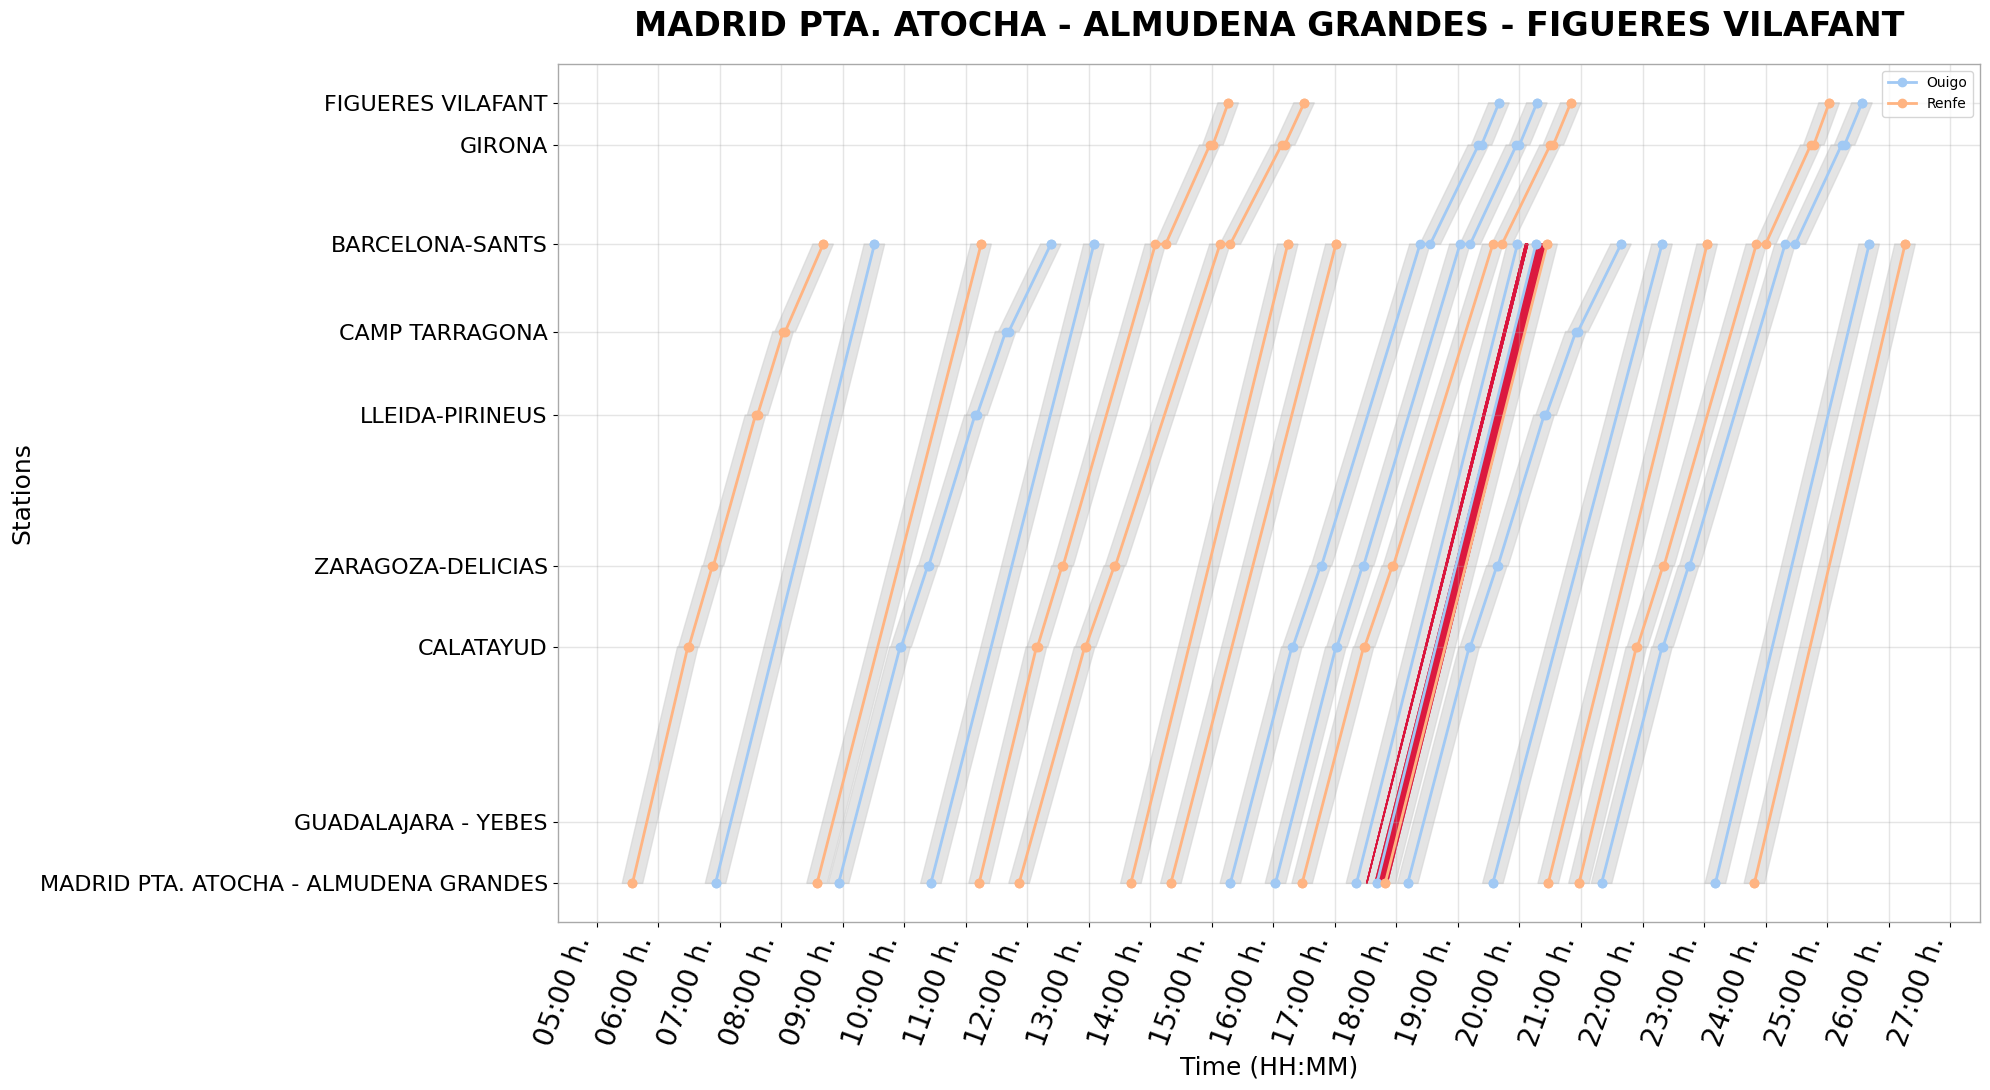

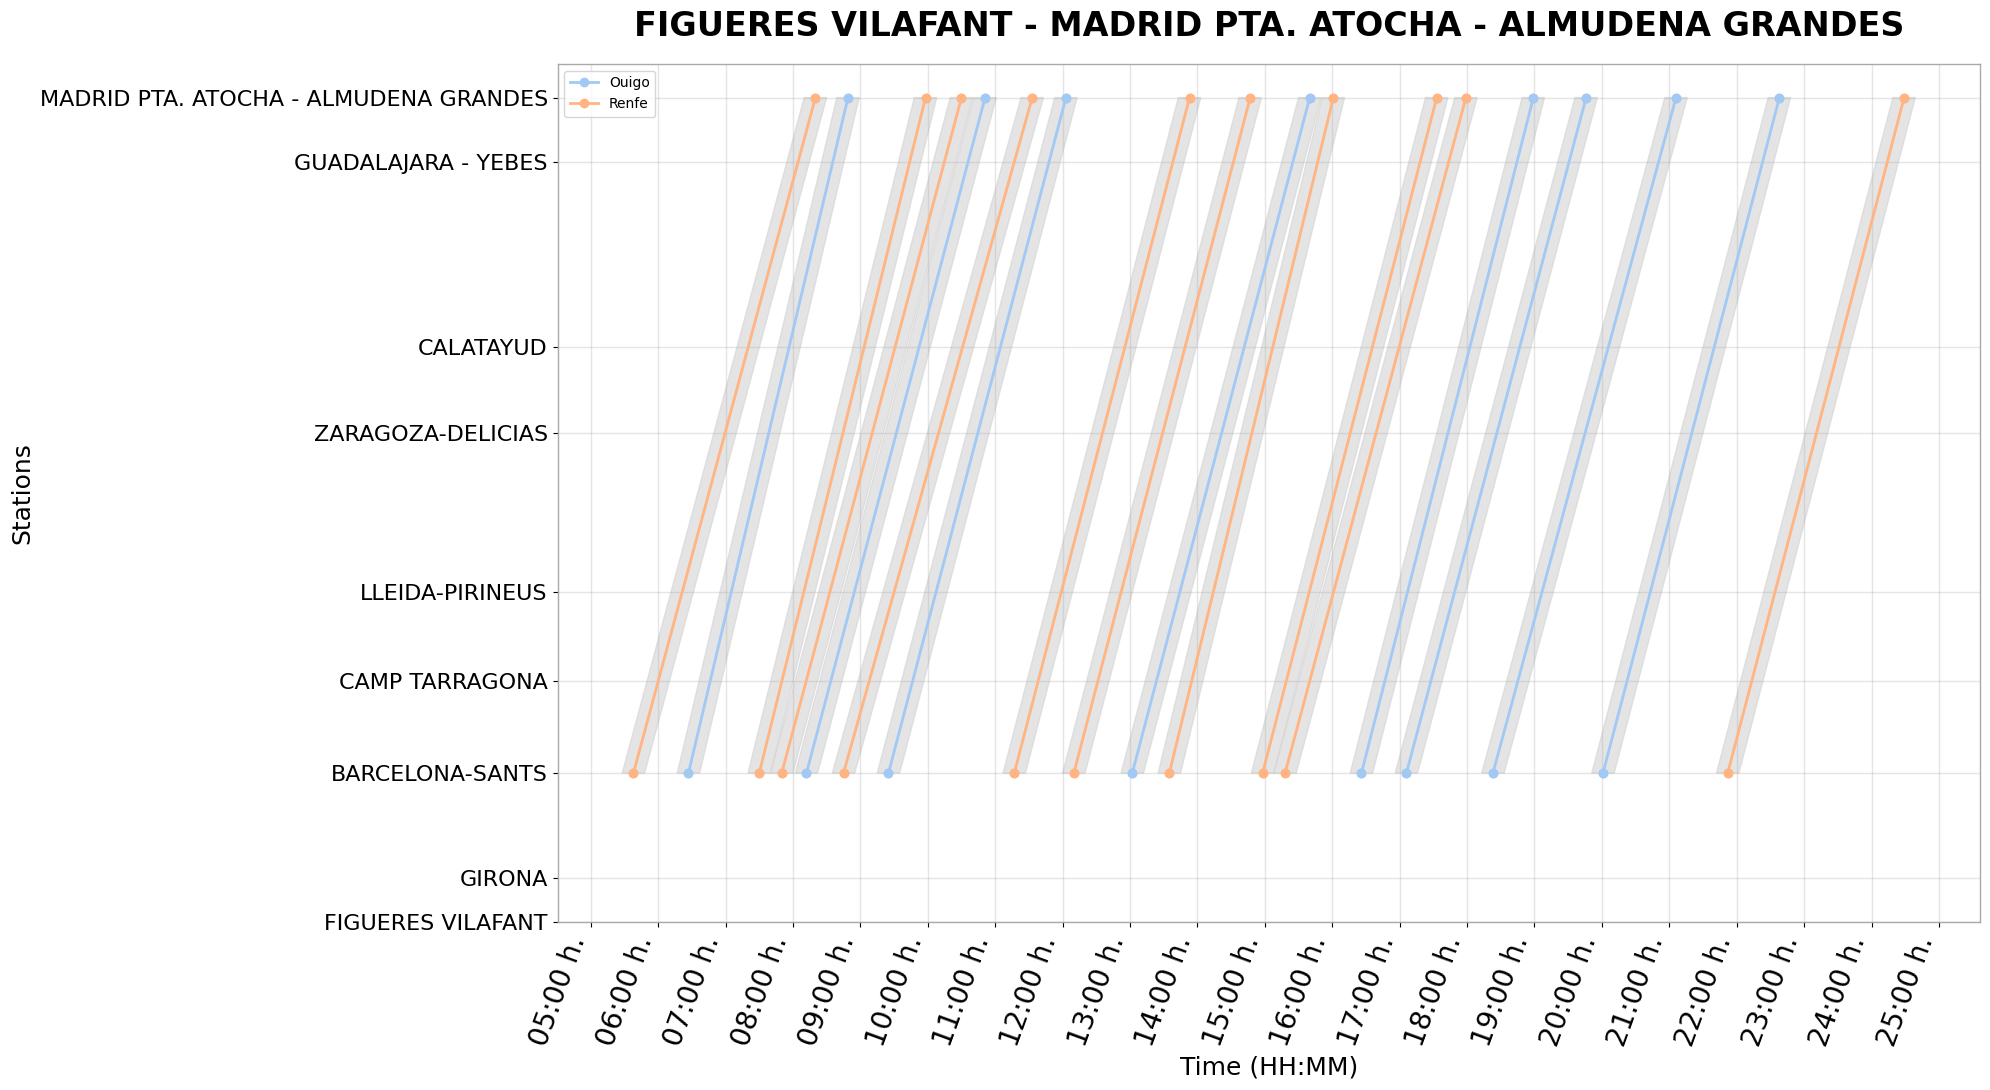

In [6]:
# TODO: Is it always necessary to provide an output path? It is unnecessary for marey chart

path_output_csv = '../data/test_case/output.csv'

kernel_plotter = KernelPlotter(
    path_output_csv=path_output_csv,
    path_config_supply=generator_save_path,
)

date = datetime.datetime.strptime('2024-06-25', '%Y-%m-%d').date()
kernel_plotter.plot_marey_chart(
    date=date,
    save_path='../reports/figures/'
)